# **PORTFOLIO OPTIMIZATION**

#### **Mục lục**
##### I. Nhập dữ liệu danh mục
##### II. Modeling
1. Portfolio Variance and Volatility
2. Efficient Frontier
3. Trọng số tài sản danh mục tối ưu
##### III. Tối ưu hóa danh mục đầu tư
1. Lọc rổ cổ phiếu
2. Đường biên hiệu quả 
3. Các phương pháp tối ưu danh mục đầu tư
##### IV. Kết luận


______________________________________________________________________________________________________________________________________________________________

#### I. Nhập dữ liệu về giá của danh mục

Dữ liệu biến động giá của các mã cổ phiếu được lấy thông qua trang web: **https://finance.vietstock.vn/**

* Trong đó, các trường dữ liệu cần lấy lần lượt là: 
**DATE, TICKER, OPEN, HIGH, LOW, CLOSE, VOLUMNE**

In [51]:
# Import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [52]:
# Directory path where all CSV files are stored
directory = "C:\\Users\\Admin\\Desktop\\Ticket\\"

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Define tickers based on file names (assuming file names contain ticker names)
tickers = [file.split('.')[0] for file in csv_files]

# Initialize an empty dictionary to store DataFrames
data_dict = {}

# Loop through CSV files and tickers to read data and store DataFrames in the dictionary
for file, ticker in zip(csv_files, tickers):
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df.columns = ["Date", "Ticker", "Open", "High", "Low", "Close", "Volume"]
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    close_price = df['Close']
    data_dict[ticker] = close_price

# Create the portfolio DataFrame
portfolio = pd.DataFrame(data_dict)

# Display the portfolio DataFrame
portfolio

,CMG,DBC,FPT,MBB,MSN,MWG,PNJ,TPB,VCB,VTK
Date,,,,,,,,,,
2023-05-23,40500,19200,82000,18750,70400,38250,72200,23700,92800,20100
2023-05-24,40750,19200,81300,18600,71800,37950,71500,23500,92600,21000
2023-05-25,40700,18850,83200,18450,72000,38000,71200,23400,93200,21000
2023-05-26,40500,19300,83100,18450,72000,38200,72000,23650,92000,20200
2023-05-29,41150,19100,83100,18750,71600,38700,71400,24300,93100,20300
...,...,...,...,...,...,...,...,...,...,...
2024-05-17,61300,33400,134500,23250,75500,59600,99100,18400,91800,63700
2024-05-20,59000,34550,133000,23450,76400,60000,97400,18450,91900,68700
2024-05-21,61500,35050,136000,23600,75800,60500,98000,18350,91100,74500


In [53]:
# Chuyển đổi giá trị các cổ phiếu về đơn vị nghìn đồng/CP

portfolio.div(1000)

,CMG,DBC,FPT,MBB,MSN,MWG,PNJ,TPB,VCB,VTK
Date,,,,,,,,,,
2023-05-23,40.50,19.20,82.0,18.75,70.4,38.25,72.2,23.70,92.8,20.1
2023-05-24,40.75,19.20,81.3,18.60,71.8,37.95,71.5,23.50,92.6,21.0
2023-05-25,40.70,18.85,83.2,18.45,72.0,38.00,71.2,23.40,93.2,21.0
2023-05-26,40.50,19.30,83.1,18.45,72.0,38.20,72.0,23.65,92.0,20.2
2023-05-29,41.15,19.10,83.1,18.75,71.6,38.70,71.4,24.30,93.1,20.3
...,...,...,...,...,...,...,...,...,...,...
2024-05-17,61.30,33.40,134.5,23.25,75.5,59.60,99.1,18.40,91.8,63.7
2024-05-20,59.00,34.55,133.0,23.45,76.4,60.00,97.4,18.45,91.9,68.7
2024-05-21,61.50,35.05,136.0,23.60,75.8,60.50,98.0,18.35,91.1,74.5


### II. Modeling

#### 1. Portfolio variance and volatility

##### Covariance and Correlation Matric

Xây dựng ma trận covariance and correlation mô tả sự thay đổi của các mã chứng khoán liên hệ với nhau trong đó:
* **Covariance**: đo lường mối quan hệ của khoản lợi nhuận của 2 tài sản khác nhau. Hiệp phương sai dương -> khoản lợi nhuận của 2 tài sản cùng tăng và ngược lại. Do đó có thể giảm thiểu rủi ro và độ biến động của danh mục đầu tư bằng cách ghép cặp tài sản có hiệp phương sai âm.

* **Correlation**: đo lường mức độ hai mã chứng khoán di chuyển liên quan tới nhau:
    + Tương quan -1 có nghĩa là mối quan hệ âm, tức là, nếu tương quan giữa Tài sản A và Tài sản B là -1, nếu Tài sản A tăng, Tài sản B giảm.
    + Tương quan +1 có nghĩa là mối quan hệ dương, tức là, nếu tương quan giữa Tài sản A và Tài sản B là +1, nếu Tài sản A tăng, Tài sản B tăng.
    + Tương quan 0 có nghĩa là không có mối quan hệ, tức là, nếu tương quan giữa Tài sản A và Tài sản B là 0, chúng không có ảnh hưởng gì đến nhau.

In [54]:
# COVARIANCE MATRIX:
cov_matrix = portfolio.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,CMG,DBC,FPT,MBB,MSN,MWG,PNJ,TPB,VCB,VTK
CMG,0.000646,0.000152,0.000095,0.000073,0.000115,0.000165,0.000090,0.000072,0.000046,0.000119
DBC,0.000152,0.000782,0.000144,0.000153,0.000252,0.000261,0.000150,0.000237,0.000054,0.000261
FPT,0.000095,0.000144,0.000305,0.000076,0.000115,0.000151,0.000082,0.000090,0.000035,0.000119
MBB,0.000073,0.000153,0.000076,0.000282,0.000126,0.000144,0.000066,0.000138,0.000055,0.000050
MSN,0.000115,0.000252,0.000115,0.000126,0.000442,0.000243,0.000106,0.000089,0.000074,0.000159
MWG,0.000165,0.000261,0.000151,0.000144,0.000243,0.000527,0.000100,0.000101,0.000061,0.000145
PNJ,0.000090,0.000150,0.000082,0.000066,0.000106,0.000100,0.000206,0.000081,0.000018,0.000102
TPB,0.000072,0.000237,0.000090,0.000138,0.000089,0.000101,0.000081,0.000673,0.000032,0.000118
VCB,0.000046,0.000054,0.000035,0.000055,0.000074,0.000061,0.000018,0.000032,0.000221,0.000058
VTK,0.000119,0.000261,0.000119,0.000050,0.000159,0.000145,0.000102,0.000118,0.000058,0.001182


In [55]:
# CORRELATION MATRIX
corr_matrix = portfolio.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,CMG,DBC,FPT,MBB,MSN,MWG,PNJ,TPB,VCB,VTK
CMG,1.000000,0.213806,0.214827,0.171978,0.215132,0.283164,0.246640,0.109278,0.122033,0.136353
DBC,0.213806,1.000000,0.294426,0.325946,0.429299,0.406721,0.374719,0.326473,0.129911,0.271777
FPT,0.214827,0.294426,1.000000,0.258125,0.313380,0.376500,0.325341,0.199299,0.135793,0.197946
MBB,0.171978,0.325946,0.258125,1.000000,0.356785,0.374182,0.273590,0.317533,0.221493,0.087062
MSN,0.215132,0.429299,0.313380,0.356785,1.000000,0.502640,0.351609,0.163986,0.236683,0.220595
MWG,0.283164,0.406721,0.376500,0.374182,0.502640,1.000000,0.304368,0.170026,0.179423,0.183542
PNJ,0.246640,0.374719,0.325341,0.273590,0.351609,0.304368,1.000000,0.218819,0.086293,0.205802
TPB,0.109278,0.326473,0.199299,0.317533,0.163986,0.170026,0.218819,1.000000,0.084197,0.132608
VCB,0.122033,0.129911,0.135793,0.221493,0.236683,0.179423,0.086293,0.084197,1.000000,0.113879
VTK,0.136353,0.271777,0.197946,0.087062,0.220595,0.183542,0.205802,0.132608,0.113879,1.000000


**Expected Returns** 

In [56]:
x_return = portfolio.resample('Y').last().pct_change().mean()
x_return

CMG    0.462069
DBC    0.301095
FPT    0.430801
MBB    0.222520
MSN    0.131343
MWG    0.448598
PNJ    0.140698
TPB    0.051724
VCB    0.133250
VTK    1.663636
dtype: float64

**Volatility**: độ lệch chuẩn của giá trị của một cổ phiếu
    
    Ta có công thức cho độ lệch chuẩn là căn bậc hai của phương sai. Tuy nhiên để tính độ lệch chuẩn của giá cổ phiếu của năm ta cần nhân phương sai với 250 (số ngày giao dịch trong 1 năm)

In [57]:
ann_sd = portfolio.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

CMG    0.401836
DBC    0.442020
FPT    0.276029
MBB    0.265346
MSN    0.332422
MWG    0.363144
PNJ    0.226949
TPB    0.410244
VCB    0.235153
VTK    0.543709
dtype: float64

In [58]:
assets = pd.concat([x_return, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Expected Returns', 'Volatility']

Có thể thấy mã VTK đem lại tỉ suất sinh lợi (166%) vượt trội so với các mã cổ phiếu còn lại, tuy nhiên đi kèm với nó là độ biến động vô cùng cao (54,3%)

#### 2. Efficient Frontier

**Portfolio Variance**: phương sai trong mức giá của cổ phiếu là một chỉ báo quan trọng thể hiện cách một khoản đầu tư biến động
**<p style="text-align: center;"> variance = (w1σ1)^2 + (w2σ2)^2 + 2w1w2.Cov12 </p>**
Trong đó:
* w1: trọng số của tài sản 1
* w2: trọng số của tài sản 2
* σ1: độ lệch chuẩn của tài sản 1
* σ2: độ lệch chuẩn của tài sản 2
* cov1,2: hiệp phương sai của 2 tài sản

Để tính toán lợi nhuận kỳ vọng của danh mục đầu tư, chúng ta cần xác định trọng số cho các tài sản đã chọn. Điều này có nghĩa là chúng ta phải quyết định tỷ lệ phần trăm của tổng số tiền đầu tư vào cổ phiếu của mỗi công ty. Vấn đề tối ưu hóa danh mục đầu tư thực chất là tìm ra các giá trị trọng số tối ưu sao cho tối đa hóa lợi nhuận kỳ vọng trong khi tối thiểu hóa rủi ro (độ lệch chuẩn).

**Efficient Frontier**: Để vẽ đồ thị của biên hiệu quả, cần chạy một vòng lặp. Trong mỗi lần lặp, vòng lặp xem xét các trọng số khác nhau cho các tài sản và tính toán lợi nhuận và độ biến động của từng tổ hợp danh mục đầu tư.

In [59]:
p_ret = [] # khởi tạo một mảng rỗng (lợi nhuận kỳ vọng của danh mục)
p_vol = [] # khởi tạo một mảng rỗng (độ biến động của danh mục)
p_weights = [] # khởi tạo một mảng rỗng (trọng số của tài sản)

num_assets = len(portfolio.columns)
num_portfolios = 10001

In [60]:
for port in range(num_portfolios):
    weights = np.random.random(num_assets) #Tạo ra một mảng ngẫu nhiên gồm 10 phần tử từ 0-1
    weights = weights/np.sum(weights) #Chuẩn hóa trọng số để tổng tỉ trọng của 10 mã cp là 100%
    p_weights.append(weights) #Lưu mảng weight này vào p_weights
    returns = np.dot(weights, x_return) #Thực hiện nhân vô hướng tỉ trọng của mã CP với lợi nhuận kỳ vọng  
    p_ret.append(returns) #Lưu mảng return này vào p_returns
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() #Tính hiệp phương sai của danh mục đầu tư
    sd = np.sqrt(var) #Độ lệch chuẩn hàng ngày
    ann_sd = sd*np.sqrt(250) #Độ lệch chuẩn hàng năm = độ biến động của mã cổ phiếu
    p_vol.append(ann_sd) #Lưu độ lệch chuẩn vào 

In [61]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(portfolio.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [62]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,CMG weight,DBC weight,FPT weight,MBB weight,MSN weight,MWG weight,PNJ weight,TPB weight,VCB weight,VTK weight
0,0.411641,0.192960,0.073762,0.008901,0.260474,0.064751,0.185656,0.083947,0.002650,0.063698,0.159183,0.096977
1,0.396000,0.216105,0.057905,0.179370,0.166988,0.041573,0.083561,0.168309,0.027466,0.096119,0.103618,0.075092
2,0.638100,0.241949,0.179751,0.166339,0.053438,0.009356,0.092427,0.016862,0.062658,0.000966,0.159732,0.258471
3,0.358521,0.207400,0.237035,0.085157,0.085101,0.032991,0.005751,0.169921,0.125828,0.129086,0.089411,0.039717
4,0.295189,0.189512,0.111880,0.074039,0.050289,0.201472,0.201877,0.009520,0.164402,0.047025,0.087373,0.052122


Dataframe 'portfolios' có 10001 phương án phân bổ tỉ trọng của danh mục đầu tư. Tiếp theo ta sẽ cần vẽ biểu đồ tương quan giữa returns và volatility của 10001 trường hợp này để tìm ra phương án hiệu quả nhất cho danh mục

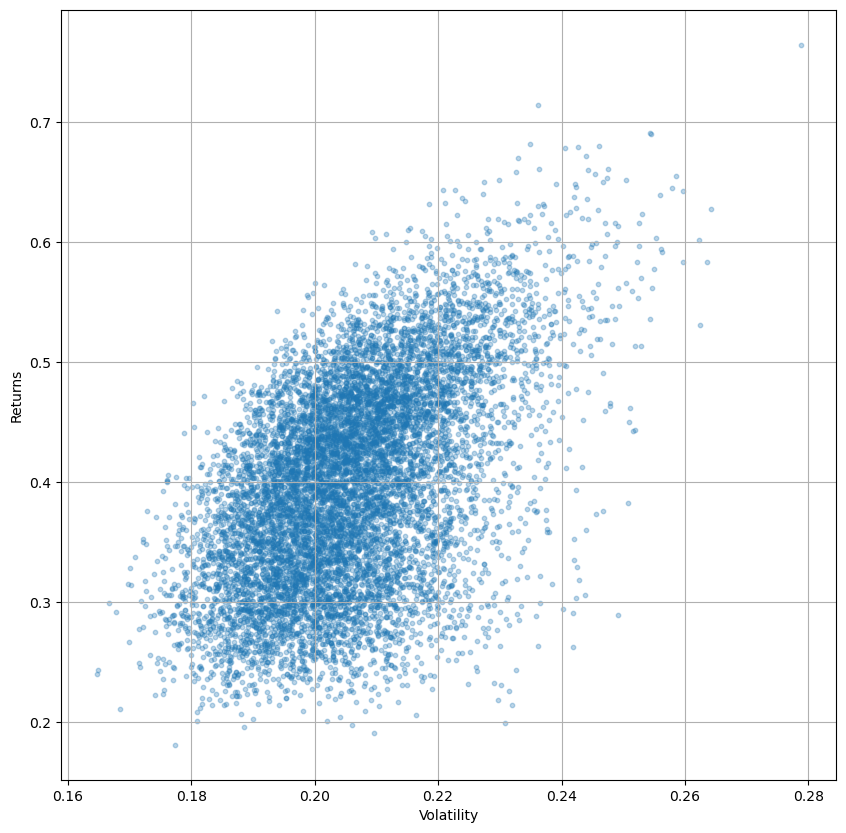

In [63]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10]);

* Đường biên bên trái thể hiện thể hiện danh mục đầu tư cổ phiếu tối ưu để có thể tối đa lợi nhuận với rủi ro thấp nhất

* Những điểm nằm bên trong đám mây là không tối ưu cho một mức độ rủi ro nhất định. Đối với mỗi điểm bên trong, luôn tồn tại một điểm khác có lợi nhuận cao hơn với cùng mức độ rủi ro.








#### 3. Trọng số tài sản danh mục tối ưu

**Sharpe Ratio**

Để tìm ra danh mục đầu tư tốt nhất, tôi sẽ sử dụng Tỉ lệ Sharpe. Đây là một thước đo xem lợi nhuận thu được là bao nhiêu trên một đơn vị rủi ro khi đầu tư vào một tài sản hay theo một chiến lược kinh doanh. Chỉ số này giúp so sánh hiệu suất của các portfolio khác nhau dựa trên sự cân bằng giữa rủi ro và lợi nhuận.

Tỉ lệ Sharpe của Danh mục đầu tư càng lớn thì hiệu suất điều chỉnh rủi ro của nó càng tốt. Nếu tỉ lệ Sharpe âm thì có nghĩa là lãi suất phi rủi ro lớn hơn lợi nhuận của danh mục đầu tư, hay lợi nhuận của danh mục đầu tư dự kiến sẽ âm. 

<p style="text-align: center">Sharpe Ratio = (Rp – Rf)/ SDp</p>

Trong đó: 
* Rp: lợi nhuận của danh mục
* Rf: lãi suất không rủi ro (đặt là 0.01)
* SDp: là độ lệch chuẩn của lợi nhuận của portfolio (biểu thị mức độ rủi ro).

In [64]:
#Sharpe Ratio của danh mục
rf = 0.01
Sharpe_Port = (portfolios['Returns']-rf)/portfolios['Volatility']
Sharpe_Port

0        2.081477
1        1.786166
2        2.595996
3        1.680427
4        1.504859
           ...   
9996     1.757316
9997     1.611802
9998     1.994166
9999     1.517025
10000    1.900979
Length: 10001, dtype: float64

In [65]:
#Danh mục có trọng số Sharpe lớn nhất
optimal_risky_port = portfolios.iloc[Sharpe_Port.idxmax()]
optimal_risky_port

Returns       0.714789
Volatility    0.236138
CMG weight    0.131676
DBC weight    0.001899
FPT weight    0.067433
MBB weight    0.039654
MSN weight    0.024702
MWG weight    0.123004
PNJ weight    0.050010
TPB weight    0.038280
VCB weight    0.210790
VTK weight    0.312551
Name: 8802, dtype: float64

In [66]:
optimal_risky_port.sort_values(ascending = False)

Returns       0.714789
VTK weight    0.312551
Volatility    0.236138
VCB weight    0.210790
CMG weight    0.131676
MWG weight    0.123004
FPT weight    0.067433
PNJ weight    0.050010
MBB weight    0.039654
TPB weight    0.038280
MSN weight    0.024702
DBC weight    0.001899
Name: 8802, dtype: float64

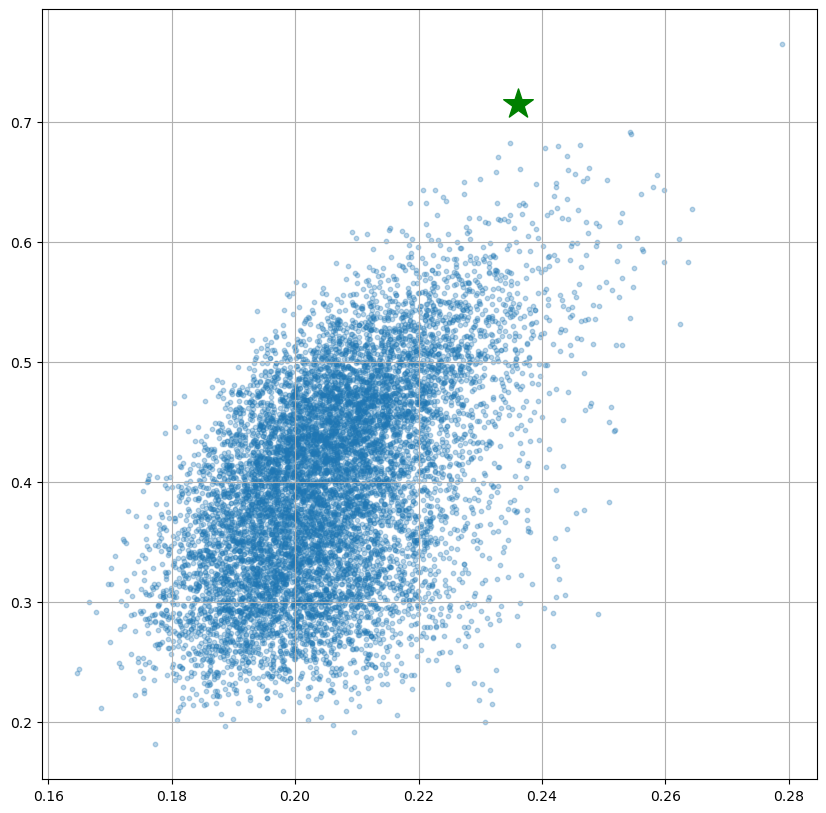

In [67]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3);
plt.grid()
plt.scatter(optimal_risky_port['Volatility'], optimal_risky_port['Returns'], color='g', marker='*', s=500);

Điểm highlight thể hiện danh mục đầu tư tối ưu dựa trên Chỉ số Sharpe. Với phương án danh mục này, tôi sẽ tập dành phần lớn số vốn đầu tư cho 4 mã cổ phiếu: VTK, MWG, MBB, CMG

### III. Tối ưu hóa danh mục đầu tư

##### 1. Stock Selection

In [68]:
selected = portfolio[["VTK", "MWG", "MBB", "CMG"]]
selected

,VTK,MWG,MBB,CMG
Date,,,,
2023-05-23,20100,38250,18750,40500
2023-05-24,21000,37950,18600,40750
2023-05-25,21000,38000,18450,40700
2023-05-26,20200,38200,18450,40500
2023-05-29,20300,38700,18750,41150
...,...,...,...,...
2024-05-17,63700,59600,23250,61300
2024-05-20,68700,60000,23450,59000
2024-05-21,74500,60500,23600,61500


##### 2. Efficient Frontier

**Covariance and Correlation**

In [69]:
#COVARIANCE MATRIX
sel_cov_matrix = selected.pct_change().apply(lambda x: np.log(1+x)).cov()
sel_cov_matrix

,VTK,MWG,MBB,CMG
VTK,0.001182,0.000145,0.000050,0.000119
MWG,0.000145,0.000527,0.000144,0.000165
MBB,0.000050,0.000144,0.000282,0.000073
CMG,0.000119,0.000165,0.000073,0.000646


In [70]:
#CORRELATION MATRIX
sel_corr_matrix = selected.pct_change().apply(lambda x: np.log(1+x)).corr()
sel_corr_matrix

,VTK,MWG,MBB,CMG
VTK,1.000000,0.183542,0.087062,0.136353
MWG,0.183542,1.000000,0.374182,0.283164
MBB,0.087062,0.374182,1.000000,0.171978
CMG,0.136353,0.283164,0.171978,1.000000


**Expected Returns & Volatility**

In [71]:
sel_return = selected.resample('Y').last().pct_change().mean()
sel_return

VTK    1.663636
MWG    0.448598
MBB    0.222520
CMG    0.462069
dtype: float64

In [72]:
sel_ann_sd = selected.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
sel_ann_sd

VTK    0.543709
MWG    0.363144
MBB    0.265346
CMG    0.401836
dtype: float64

In [73]:
sel_assets = pd.concat([sel_return, sel_ann_sd], axis=1) #Bảng này dùng để visualizing hóa return và volatility của tài sản
sel_assets.columns = ['Returns', 'Volatility']
sel_assets

,Returns,Volatility
VTK,1.663636,0.543709
MWG,0.448598,0.363144
MBB,0.222520,0.265346
CMG,0.462069,0.401836


**Efficient Frontier**

Thực hiện tương tự như với toàn bộ danh mục đầu tư

In [74]:
sel_p_ret = [] # Define an empty array for portfolio returns
sel_p_vol = [] # Define an empty array for portfolio volatility
sel_p_weights = [] # Define an empty array for asset weights

sel_num_assets = len(selected.columns)
num_selected = 10000

In [75]:
for port in range(num_selected):
    sel_weights = np.random.random(sel_num_assets)
    sel_weights = sel_weights/np.sum(sel_weights)
    sel_p_weights.append(sel_weights)
    sel_returns = np.dot(sel_weights, sel_return)
    sel_p_ret.append(sel_returns)
    sel_var = sel_cov_matrix.mul(sel_weights, axis=0).mul(sel_weights, axis=1).sum().sum()# Portfolio Variance
    sel_sd = np.sqrt(sel_var) # Daily standard deviation
    sel_ann_sd = sel_sd*np.sqrt(250) # Annual standard deviation = volatility
    sel_p_vol.append(sel_ann_sd)

In [76]:
sel_data = {'Returns':sel_p_ret, 'Volatility':sel_p_vol}

for counter, symbol in enumerate(selected.columns.tolist()):
    sel_data[symbol+' weight'] = [w[counter] for w in sel_p_weights]

In [77]:
sel_portfolios  = pd.DataFrame(sel_data)
sel_portfolios

,Returns,Volatility,VTK weight,MWG weight,MBB weight,CMG weight
0,0.762344,0.262469,0.293612,0.247634,0.205318,0.253436
1,0.486666,0.234777,0.109351,0.084067,0.441092,0.365490
2,0.746505,0.282792,0.248042,0.341076,0.037608,0.373273
3,0.789161,0.263276,0.328939,0.141408,0.276542,0.253111
4,0.423377,0.254444,0.029030,0.239967,0.293638,0.437365
...,...,...,...,...,...,...
9995,0.846514,0.281887,0.385548,0.276562,0.313470,0.024420
9996,0.854818,0.276989,0.381638,0.211257,0.262864,0.144241
9997,0.852380,0.278934,0.407857,0.116710,0.409875,0.065558
9998,0.732073,0.254184,0.279254,0.209519,0.261810,0.249416


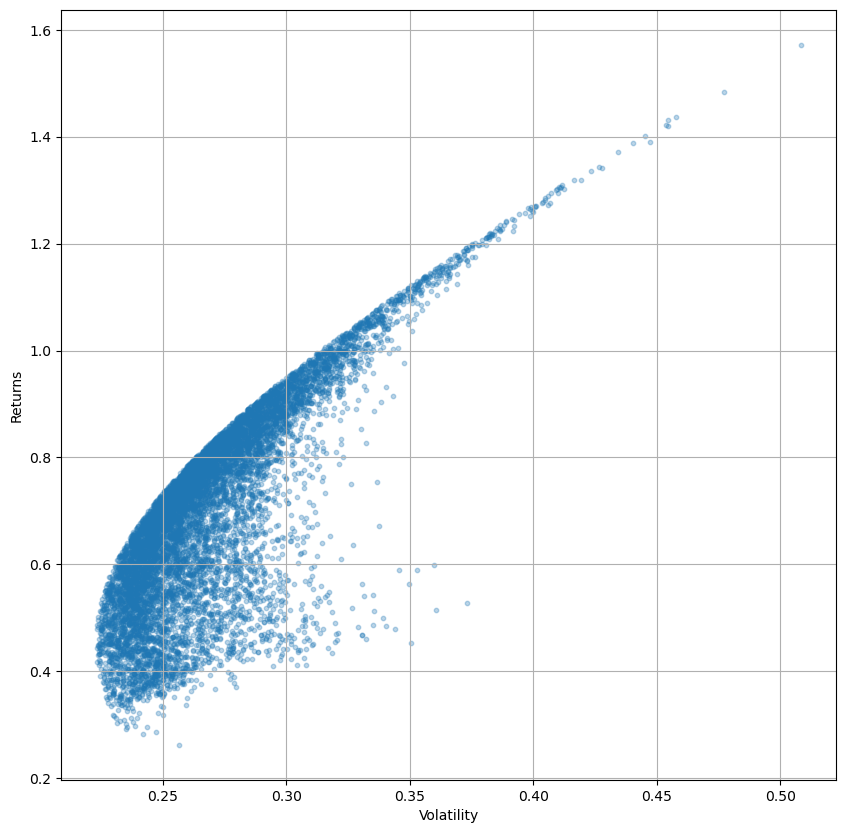

In [78]:
sel_portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10]);

##### 3. Portfolio Optimization Methods

**Portfolio with minimum Volatility (Risk)**

In [79]:
min_vol_port = sel_portfolios.iloc[sel_portfolios['Volatility'].idxmin()] #Sử dụng hàm iloc để lấy ra danh mục có tỉ lệ biến động thấp nhất
min_vol_port

Returns       0.479742
Volatility    0.223232
VTK weight    0.127351
MWG weight    0.125306
MBB weight    0.557966
CMG weight    0.189377
Name: 8626, dtype: float64

Danh mục có tỉ lệ rủi ro thấp nhất có tỉ trọng của các mã cổ phiếu MBB, CMG, MWG, và VTK lần lượt là: 59%, 18%, 12%, 10%. Vị trí của danh mục này trong biểu đồ được biểu thị như sau

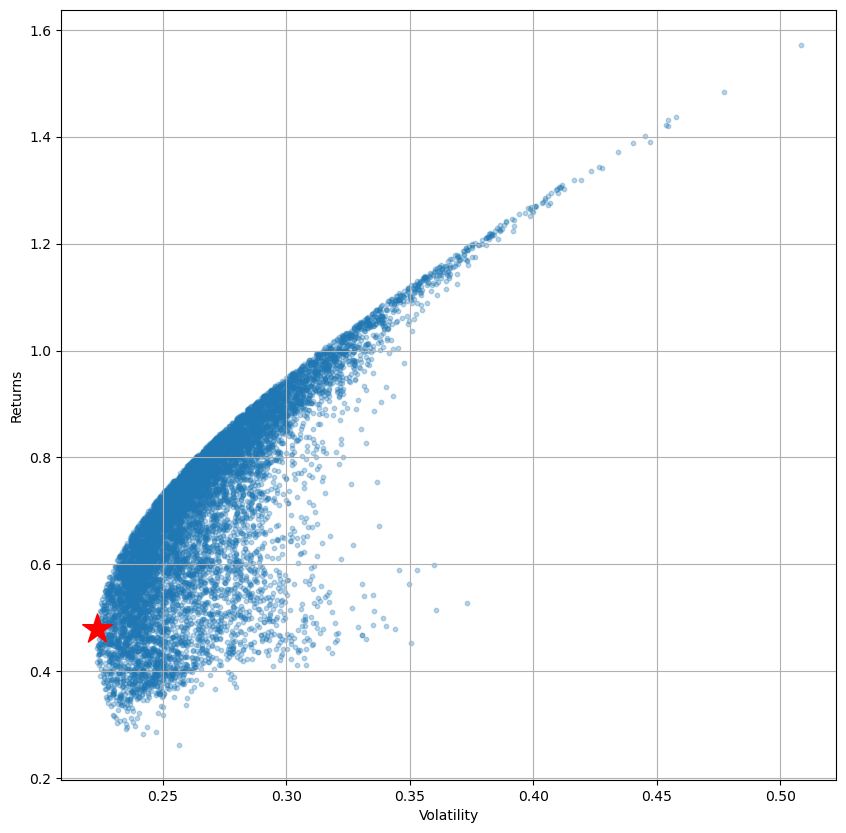

In [80]:
plt.subplots(figsize=[10,10])
plt.scatter(sel_portfolios['Volatility'], sel_portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port['Volatility'], min_vol_port['Returns'], color='r', marker='*', s=500);
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Returns');

Vị trí được highlight màu đỏ biểu thị danh mục hiệu quả nhất nếu xét theo mức độ rủi ro

**Optimal Portfolio (Maximum Sharpe Ratio)**

In [81]:
rf = 0.01 #risk free rate factor

#SHARPE RATIO CỦA DANH MỤC
sel_sharpe_port = (portfolios['Returns']-rf)/portfolios['Volatility']
sel_sharpe_port

0        2.081477
1        1.786166
2        2.595996
3        1.680427
4        1.504859
           ...   
9996     1.757316
9997     1.611802
9998     1.994166
9999     1.517025
10000    1.900979
Length: 10001, dtype: float64

In [82]:
optimal_portfolio = sel_portfolios.iloc[sel_sharpe_port.idxmax()]
optimal_portfolio.sort_values()

VTK weight    0.122858
Volatility    0.229561
CMG weight    0.230471
MWG weight    0.248248
MBB weight    0.398423
Returns       0.510906
Name: 8802, dtype: float64

Danh mục đầu tư với tỉ lệ Sharpe lớn nhất là danh mục có tỉ trọng của các mã cố phiếu CMG, MWG, MBB, VTK lần lượt là: 7%, 25%, 27%, 41%

    So với danh mục có tỉ lệ rủi ro thấp nhất, danh mục tối ưu này có tỉ lệ rủi ro chỉ cao hơn 6% (28% vs 22%), tuy nhiên, lợi suất kỳ vọng của danh mục này cao hơn lên đến 45% (88% vs 43%) => Sự đánh đổi về rủi ro so với lợi suất kỳ vọng nhận về là hoàn toàn hiệu quả

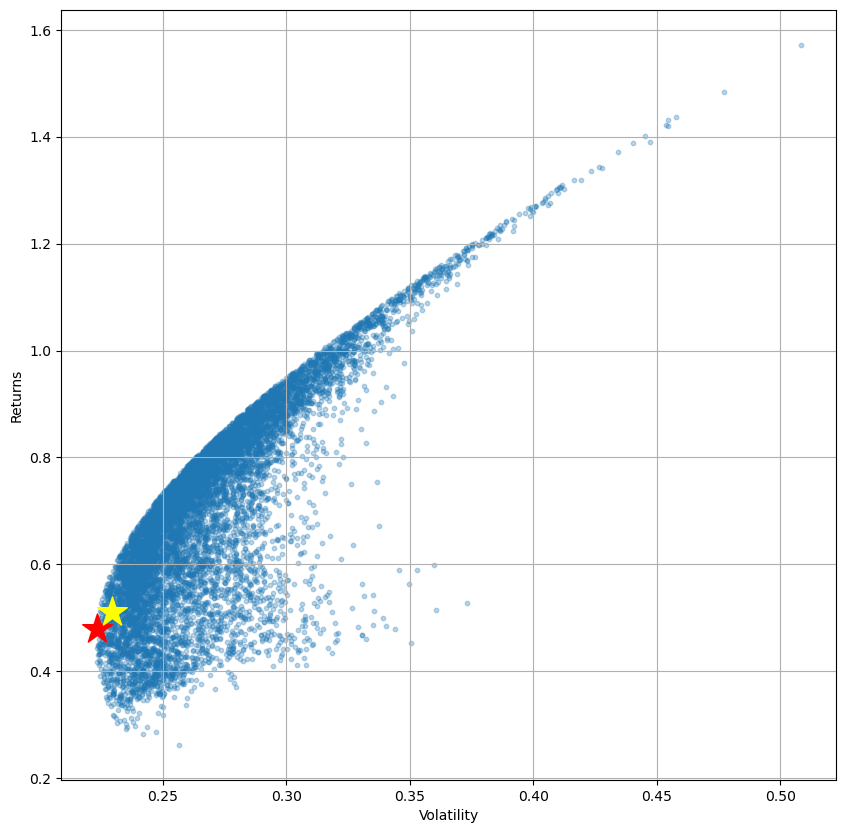

In [83]:
plt.subplots(figsize=(10, 10))
plt.scatter(sel_portfolios['Volatility'], sel_portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port['Volatility'], min_vol_port['Returns'], color='red', marker='*', s=500)
plt.scatter(optimal_portfolio['Volatility'], optimal_portfolio['Returns'], color='yellow', marker='*', s=500);
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Returns');

### IV. Kết luận

Trong mỗi trường hợp, việc tối ưu hóa tài sản đều liên quan đến cân đối sự đánh đổi giữa rủi ro và lợi nhuận, trong đó lợi nhuận từ một cổ phiếu là lợi nhuận thực hiện sau một khoảng thời gian và rủi ro là độ lệch chuẩn trong giá trị của một tài sản. Nhiều phương pháp tối ưu hóa danh mục tài sản có sẵn thực chất là các phương pháp mở rộng của các phương pháp đa dạng hóa cho các tài sản trong lĩnh vực đầu tư. Ý tưởng ở đây là việc sở hữu một danh mục các loại tài sản khác nhau ít rủi ro hơn so với việc sở hữu các tài sản tương đồng.

Việc tìm ra các phương pháp phù hợp cho việc tối ưu hóa danh mục tài sản là một phần quan trọng của công việc được thực hiện bởi các ngân hàng đầu tư và các công ty quản lý tài sản. Một trong những phương pháp sớm nhất là tối ưu hóa phương sai trung bình dựa trên lý thuyết danh mục hiện đại, nó có nhiều hạn chế như giả định rằng lợi nhuận lịch sử hoàn toàn phản ánh lợi nhuận tương lai. Vì vậy, dữ liệu này có thể không áp dụng được vào các tình huống mới trên thị trường. Ngoài ra, các hàm MPT dựa trên một bộ giả định tiêu chuẩn về hành vi thị trường. Những giả định này có thể không phản ánh đúng trong một môi trường tài chính thay đổi liên tục.

Các phương pháp bổ sung như phân chia rủi ro phân cấp (HRP), giá trị rủi ro trung bình có điều kiện (mCVAR), một phương pháp phân bổ tài sản chiến lược có thể là một lựa chọn có thể giải quyết một số hạn chế của phương pháp tối ưu hóa phương sai trung bình.

Tối ưu hóa danh mục tài sản đóng một vai trò quan trọng trong ngành công nghiệp bằng cách cho phép các doanh nghiệp tối đa hóa lợi nhuận và giảm thiểu rủi ro. Nó cung cấp một phương pháp tiếp cận hệ thống cho việc ra quyết định, đảm bảo rằng các khoản đầu tư được điều chỉnh với các mục tiêu tài chính của tổ chức. Bằng cách tối ưu hóa phân bổ tài sản, các doanh nghiệp có thể cải thiện lợi nhuận điều chỉnh theo rủi ro, tăng cường sự đa dạng hóa của danh mục, và quản lý hiệu quả rủi ro của mình đối với biến động trên thị trường.